# Data exploration and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dtype_mapping = {
    'listing_id': str,
    'id': str
}

In [30]:
# csvfile_path = "./Amsterdam/listings_cleaned.csv"
csvfile_path = "./NewYork/listings_cleaned.csv"
listings_csv_data = pd.read_csv(csvfile_path, dtype=dtype_mapping)
listings_csv_data.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
   

In [31]:
cat_cols = ['neighbourhood_cleansed', 'property_type', 'room_type', 'host_response_time']

In [32]:
for col in cat_cols:
    values = listings_csv_data[col].value_counts()
    print(values, "\n")

neighbourhood_cleansed
Bedford-Stuyvesant            1746
Williamsburg                  1359
Harlem                        1120
Midtown                        938
Hell's Kitchen                 874
                              ... 
Bay Terrace, Staten Island       1
Chelsea, Staten Island           1
Willowbrook                      1
Dongan Hills                     1
Richmondtown                     1
Name: count, Length: 220, dtype: int64 

property_type
Entire rental unit             9675
Private room in rental unit    5358
Private room in home           1750
Entire home                    1008
Entire condo                    826
                               ... 
Private room in camper/rv         1
Shared room in bungalow           1
Cave                              1
Entire home/apt                   1
Barn                              1
Name: count, Length: 63, dtype: int64 

room_type
Entire home/apt    12978
Private room        9413
Shared room          185
Hotel room      

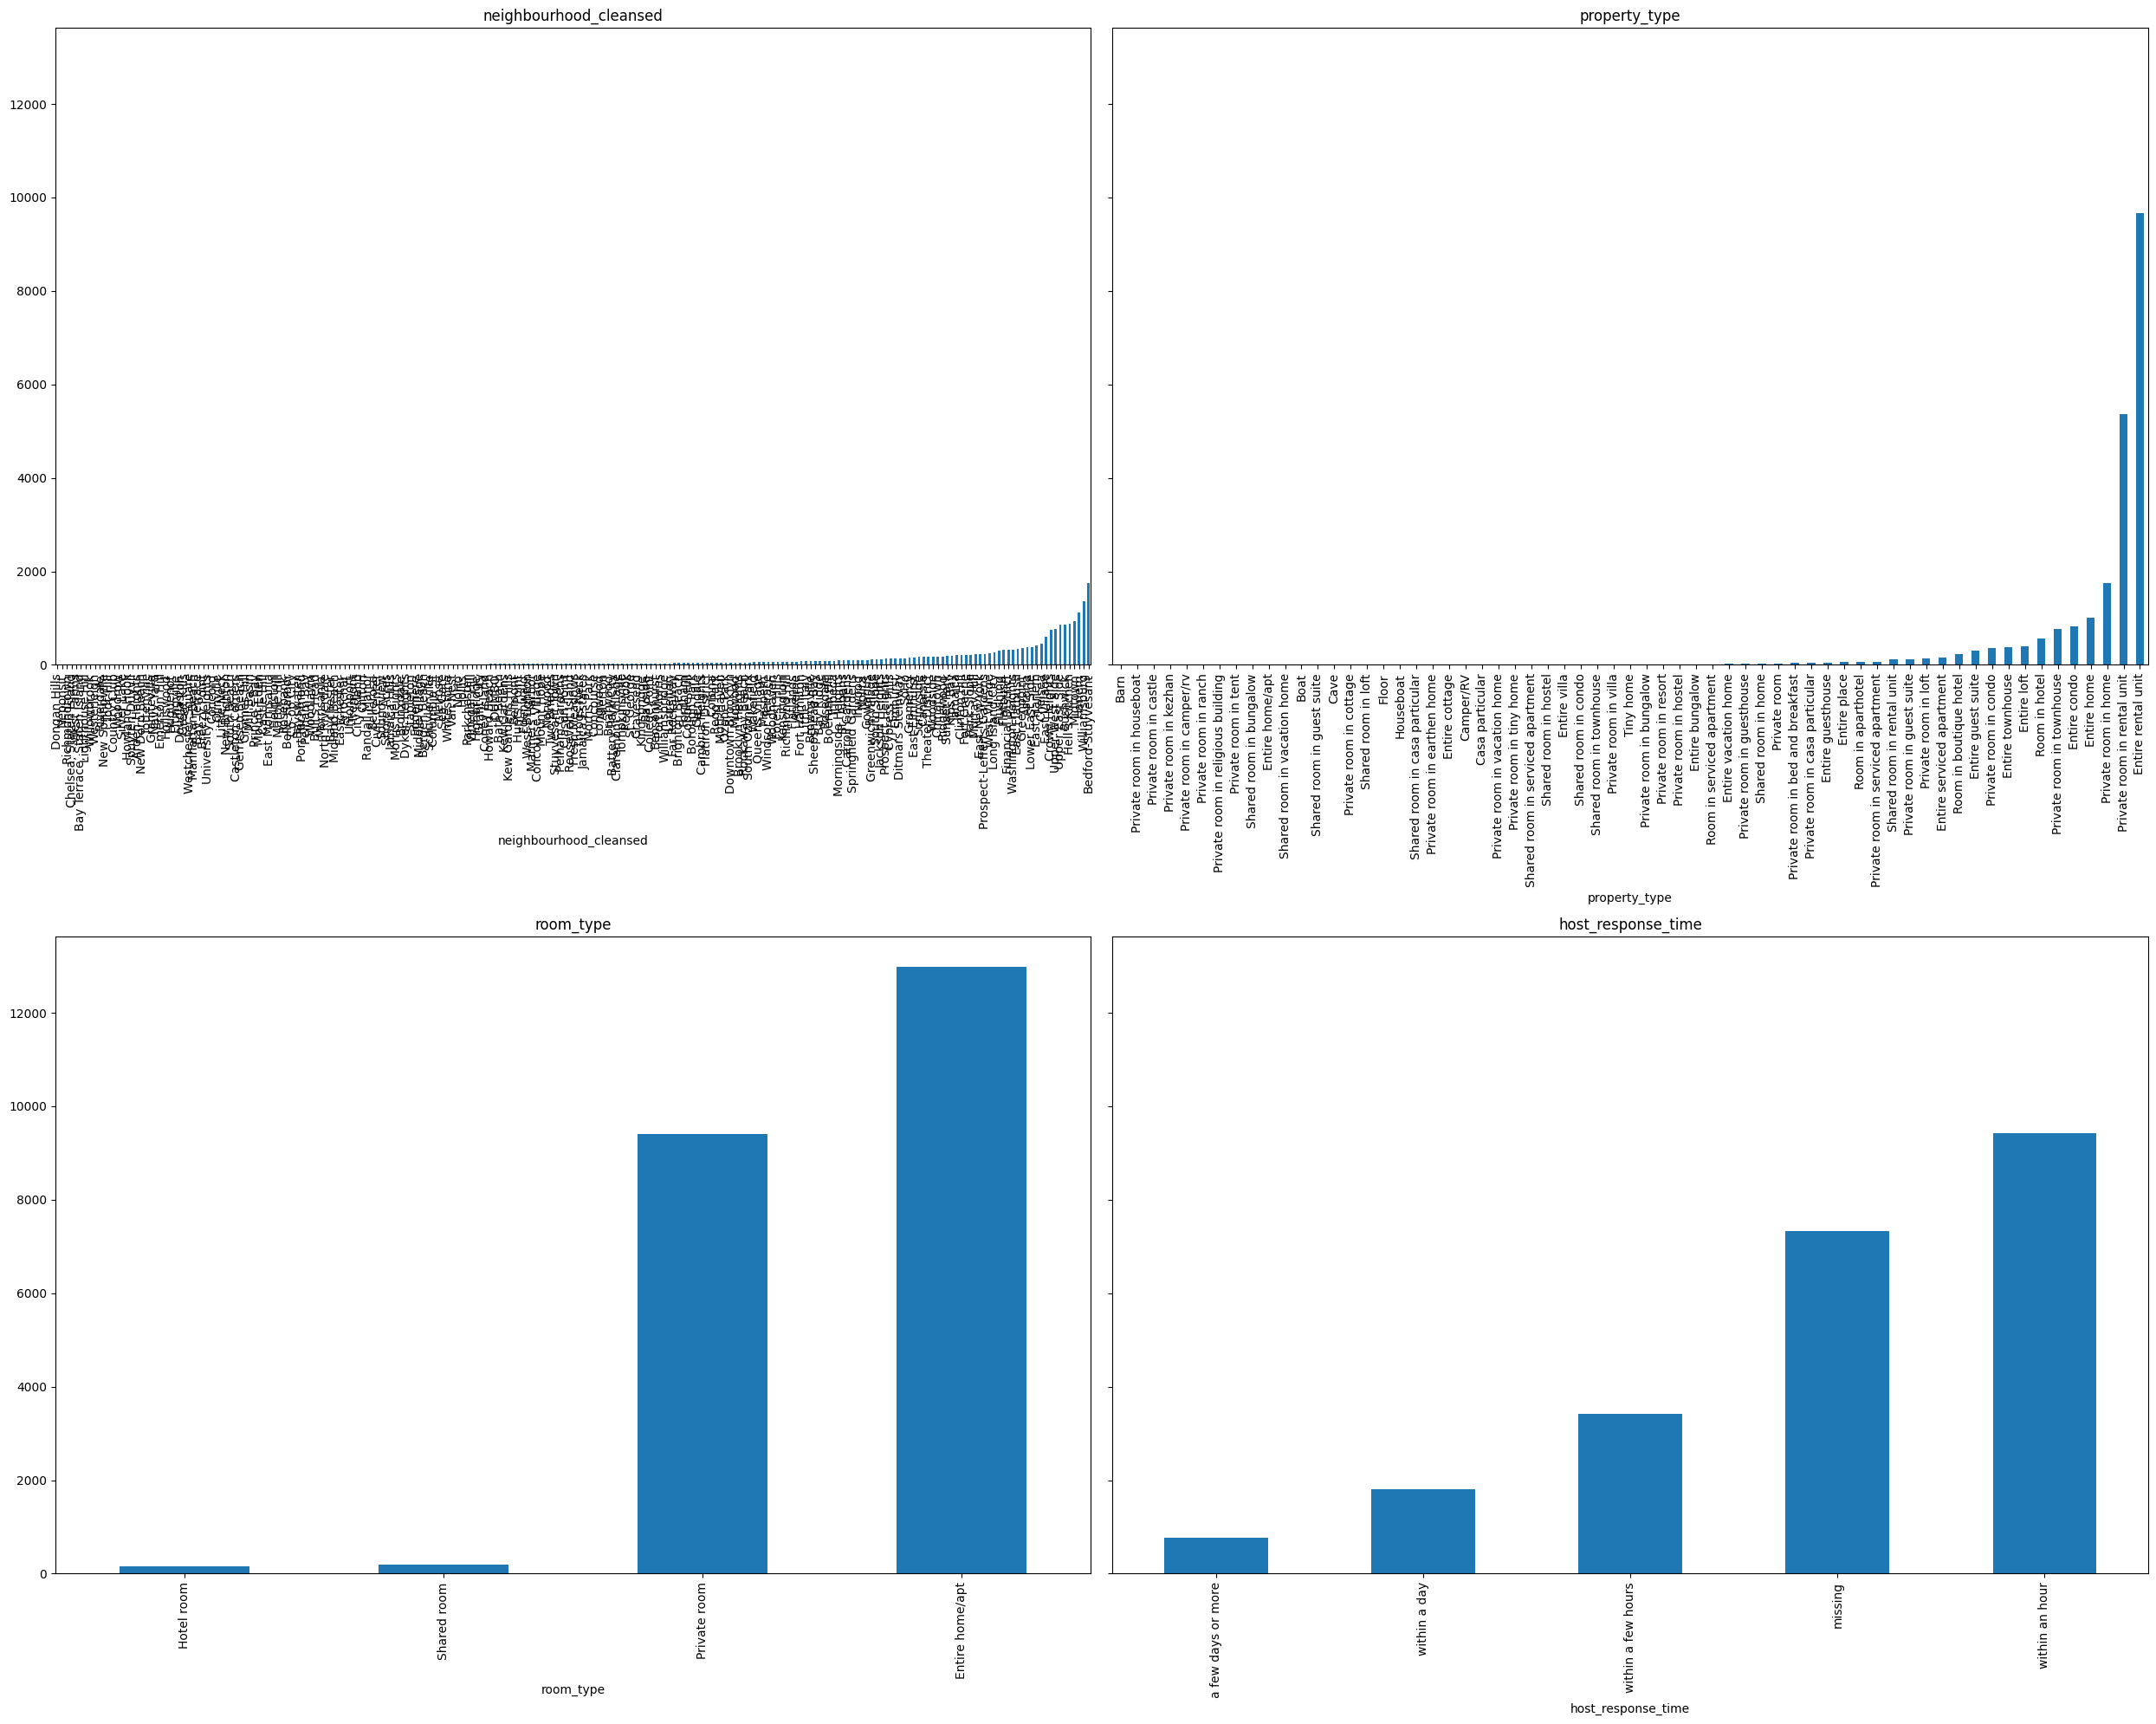

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,20), sharey=True)

cat_cols = list(cat_cols)

for col, ax in zip(cat_cols, axes.flatten()):
    (listings_csv_data.groupby(col)
         .count()['price']
         .sort_values()
         .plot
         .bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

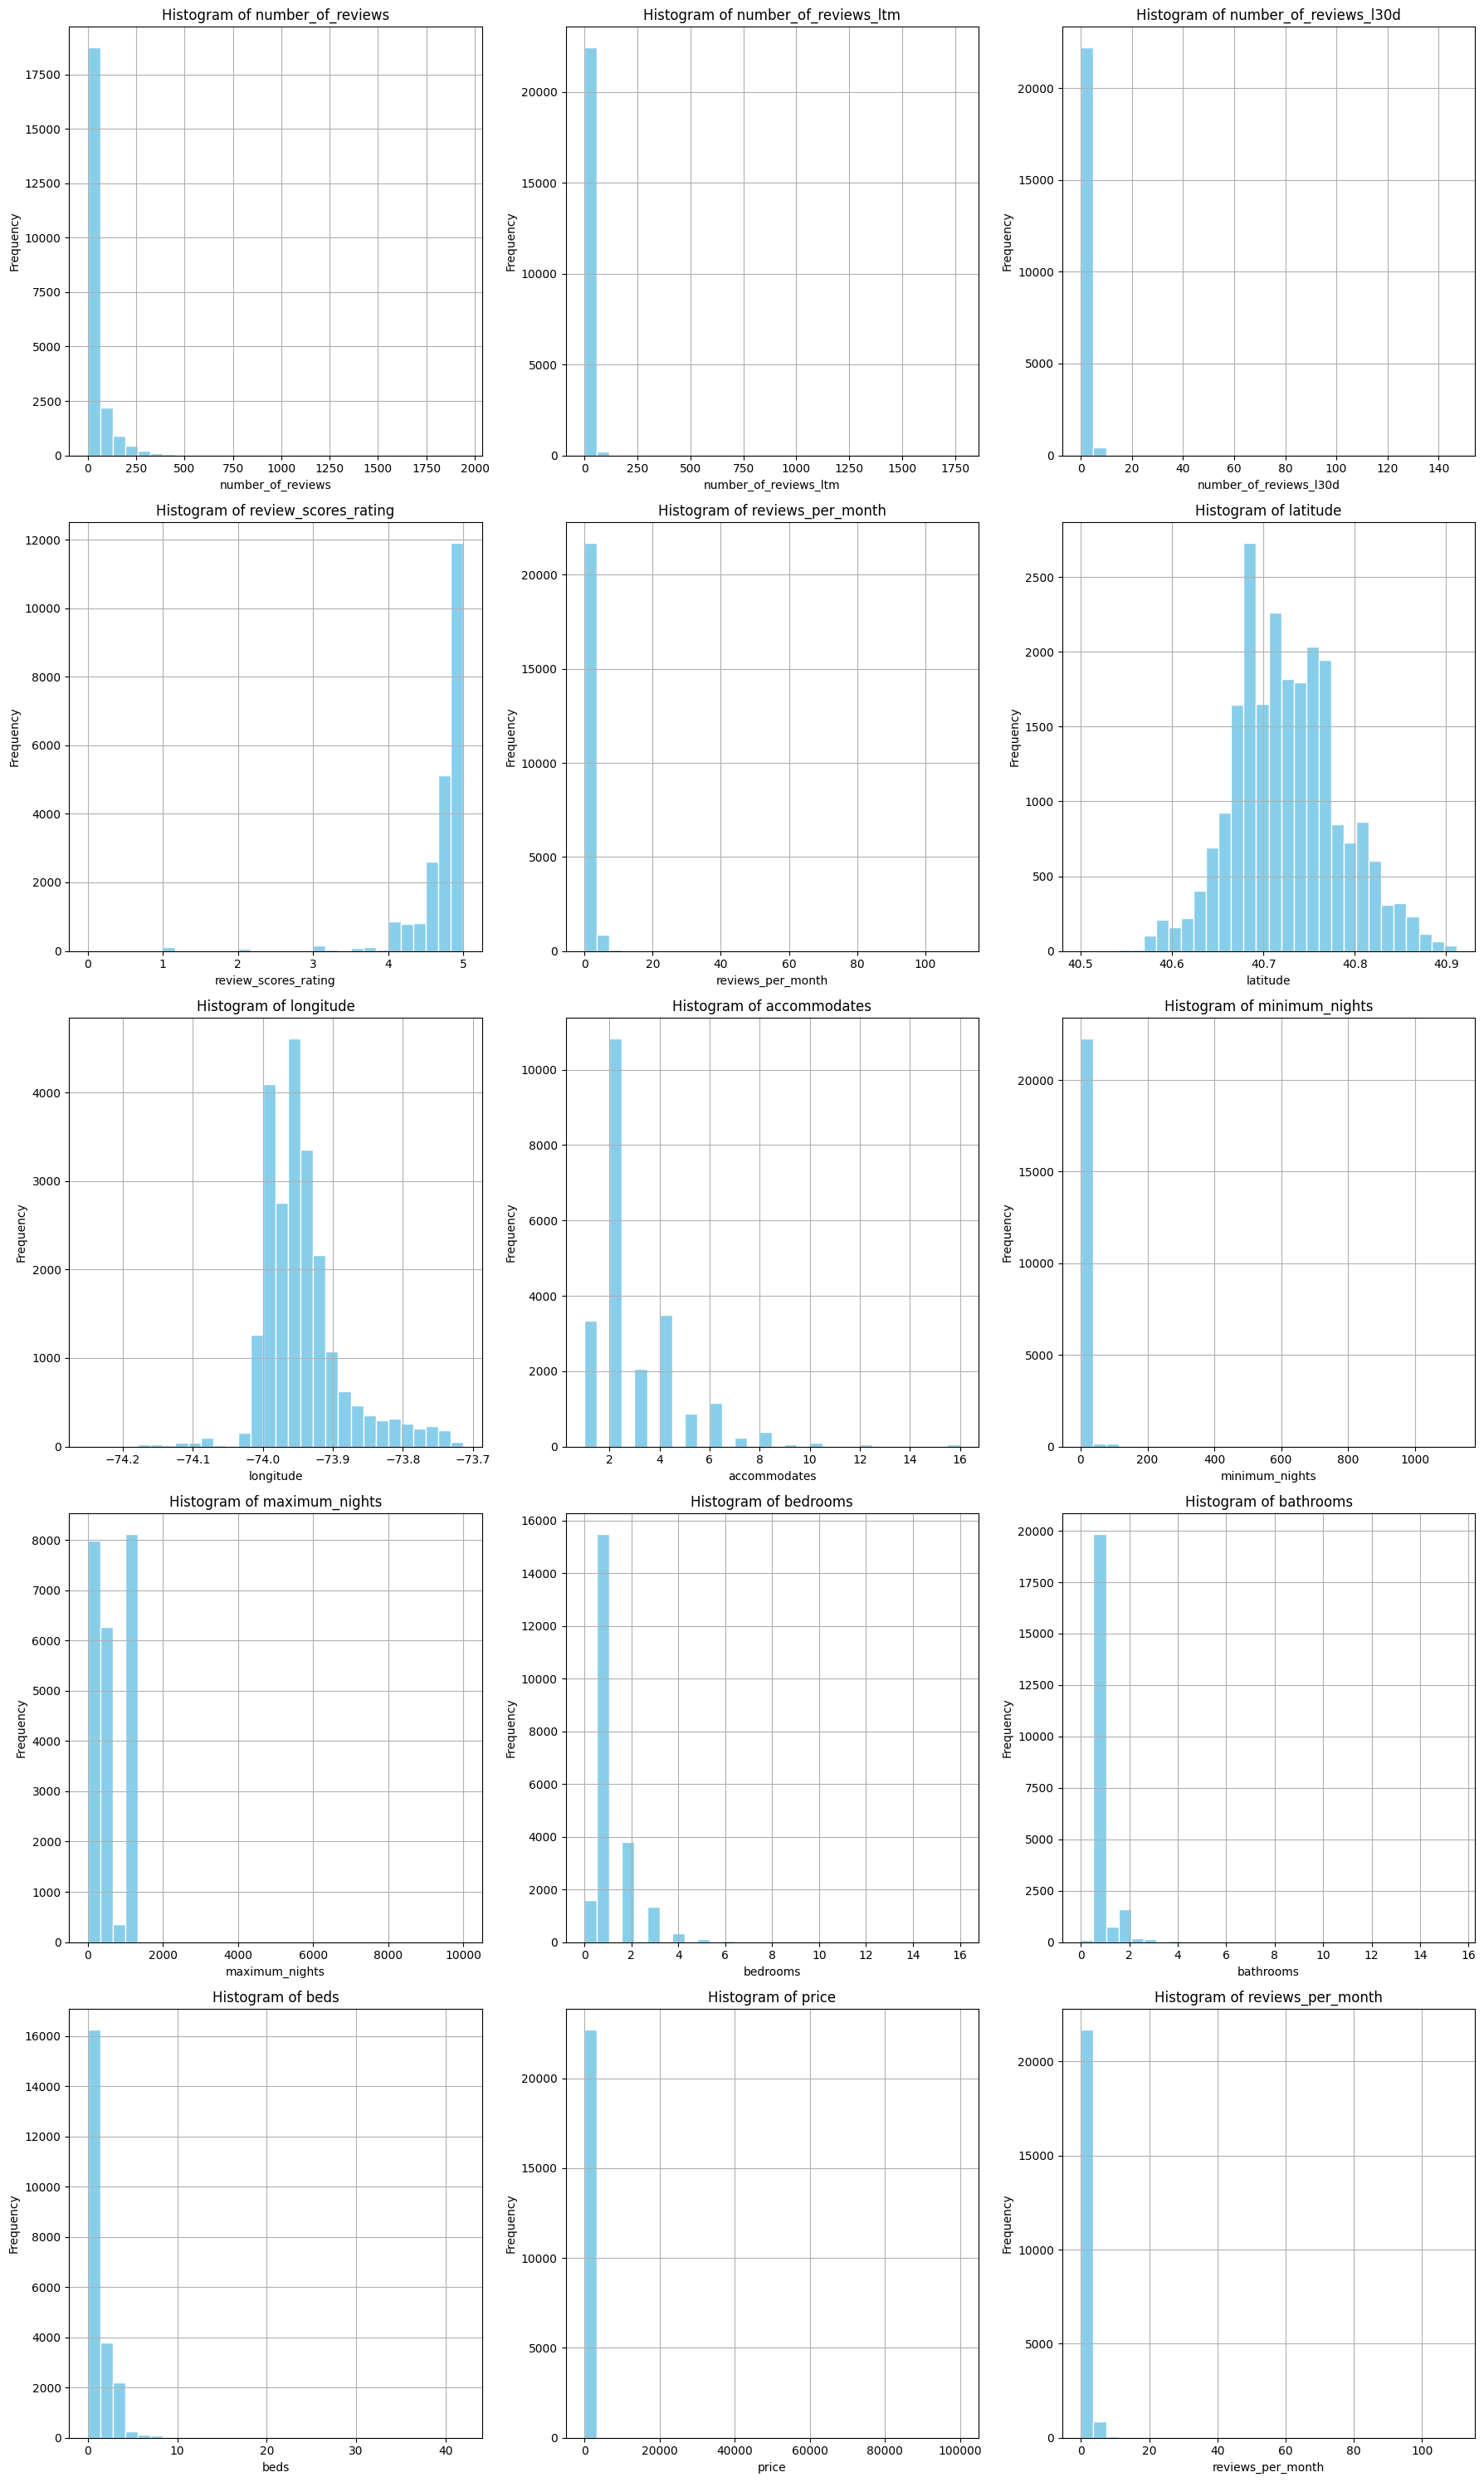

In [ ]:
cols = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
        'review_scores_rating', 'reviews_per_month', 'latitude', 'longitude', 'accommodates',
        'minimum_nights', 'maximum_nights', 'bedrooms', 'bathrooms', 'beds', 'price', 'reviews_per_month']
num_cols = 3
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()
for i, col in enumerate(cols):
        listings_csv_data.hist(column=col, bins=30, ax=axes[i], color='skyblue', edgecolor='white')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

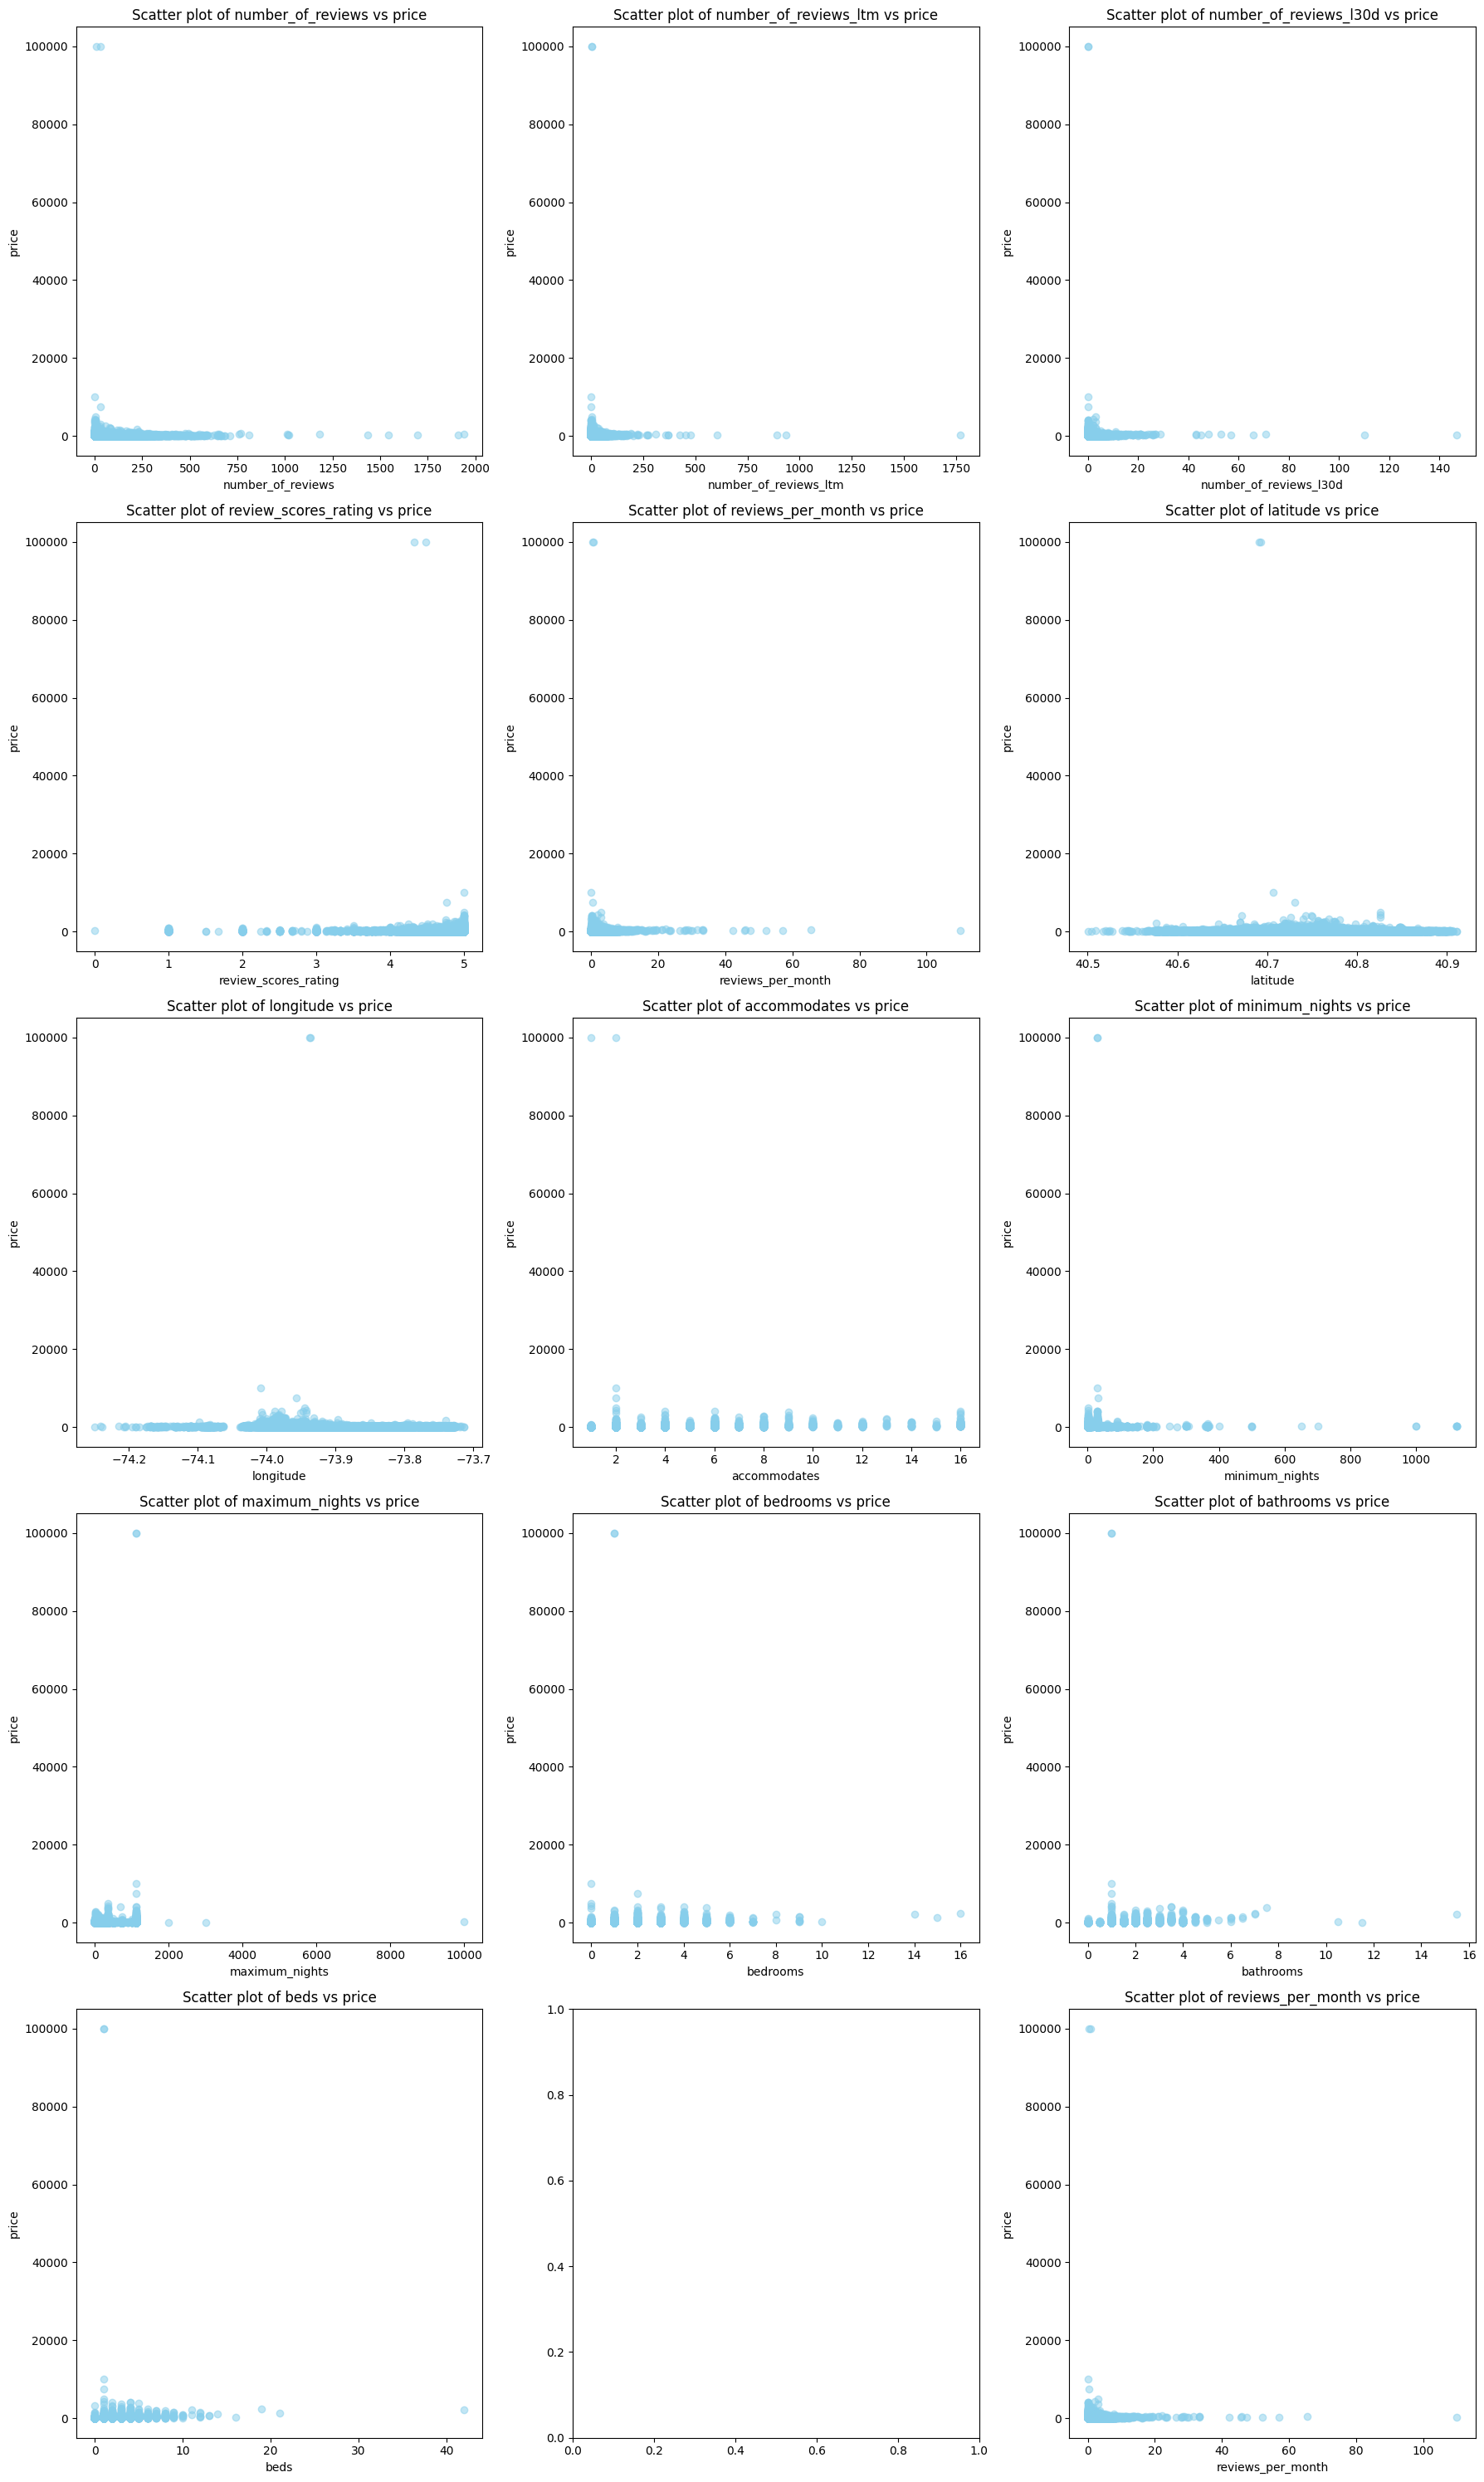

In [41]:
num_cols = 3
num_rows = 5
y_axis_column = 'price'

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()
for i, col in enumerate(cols):
    if col != y_axis_column and col in listings_csv_data.columns:
        axes[i].scatter(listings_csv_data[col], listings_csv_data[y_axis_column], alpha=0.5, color='skyblue')
        axes[i].set_title(f'Scatter plot of {col} vs {y_axis_column}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(y_axis_column)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

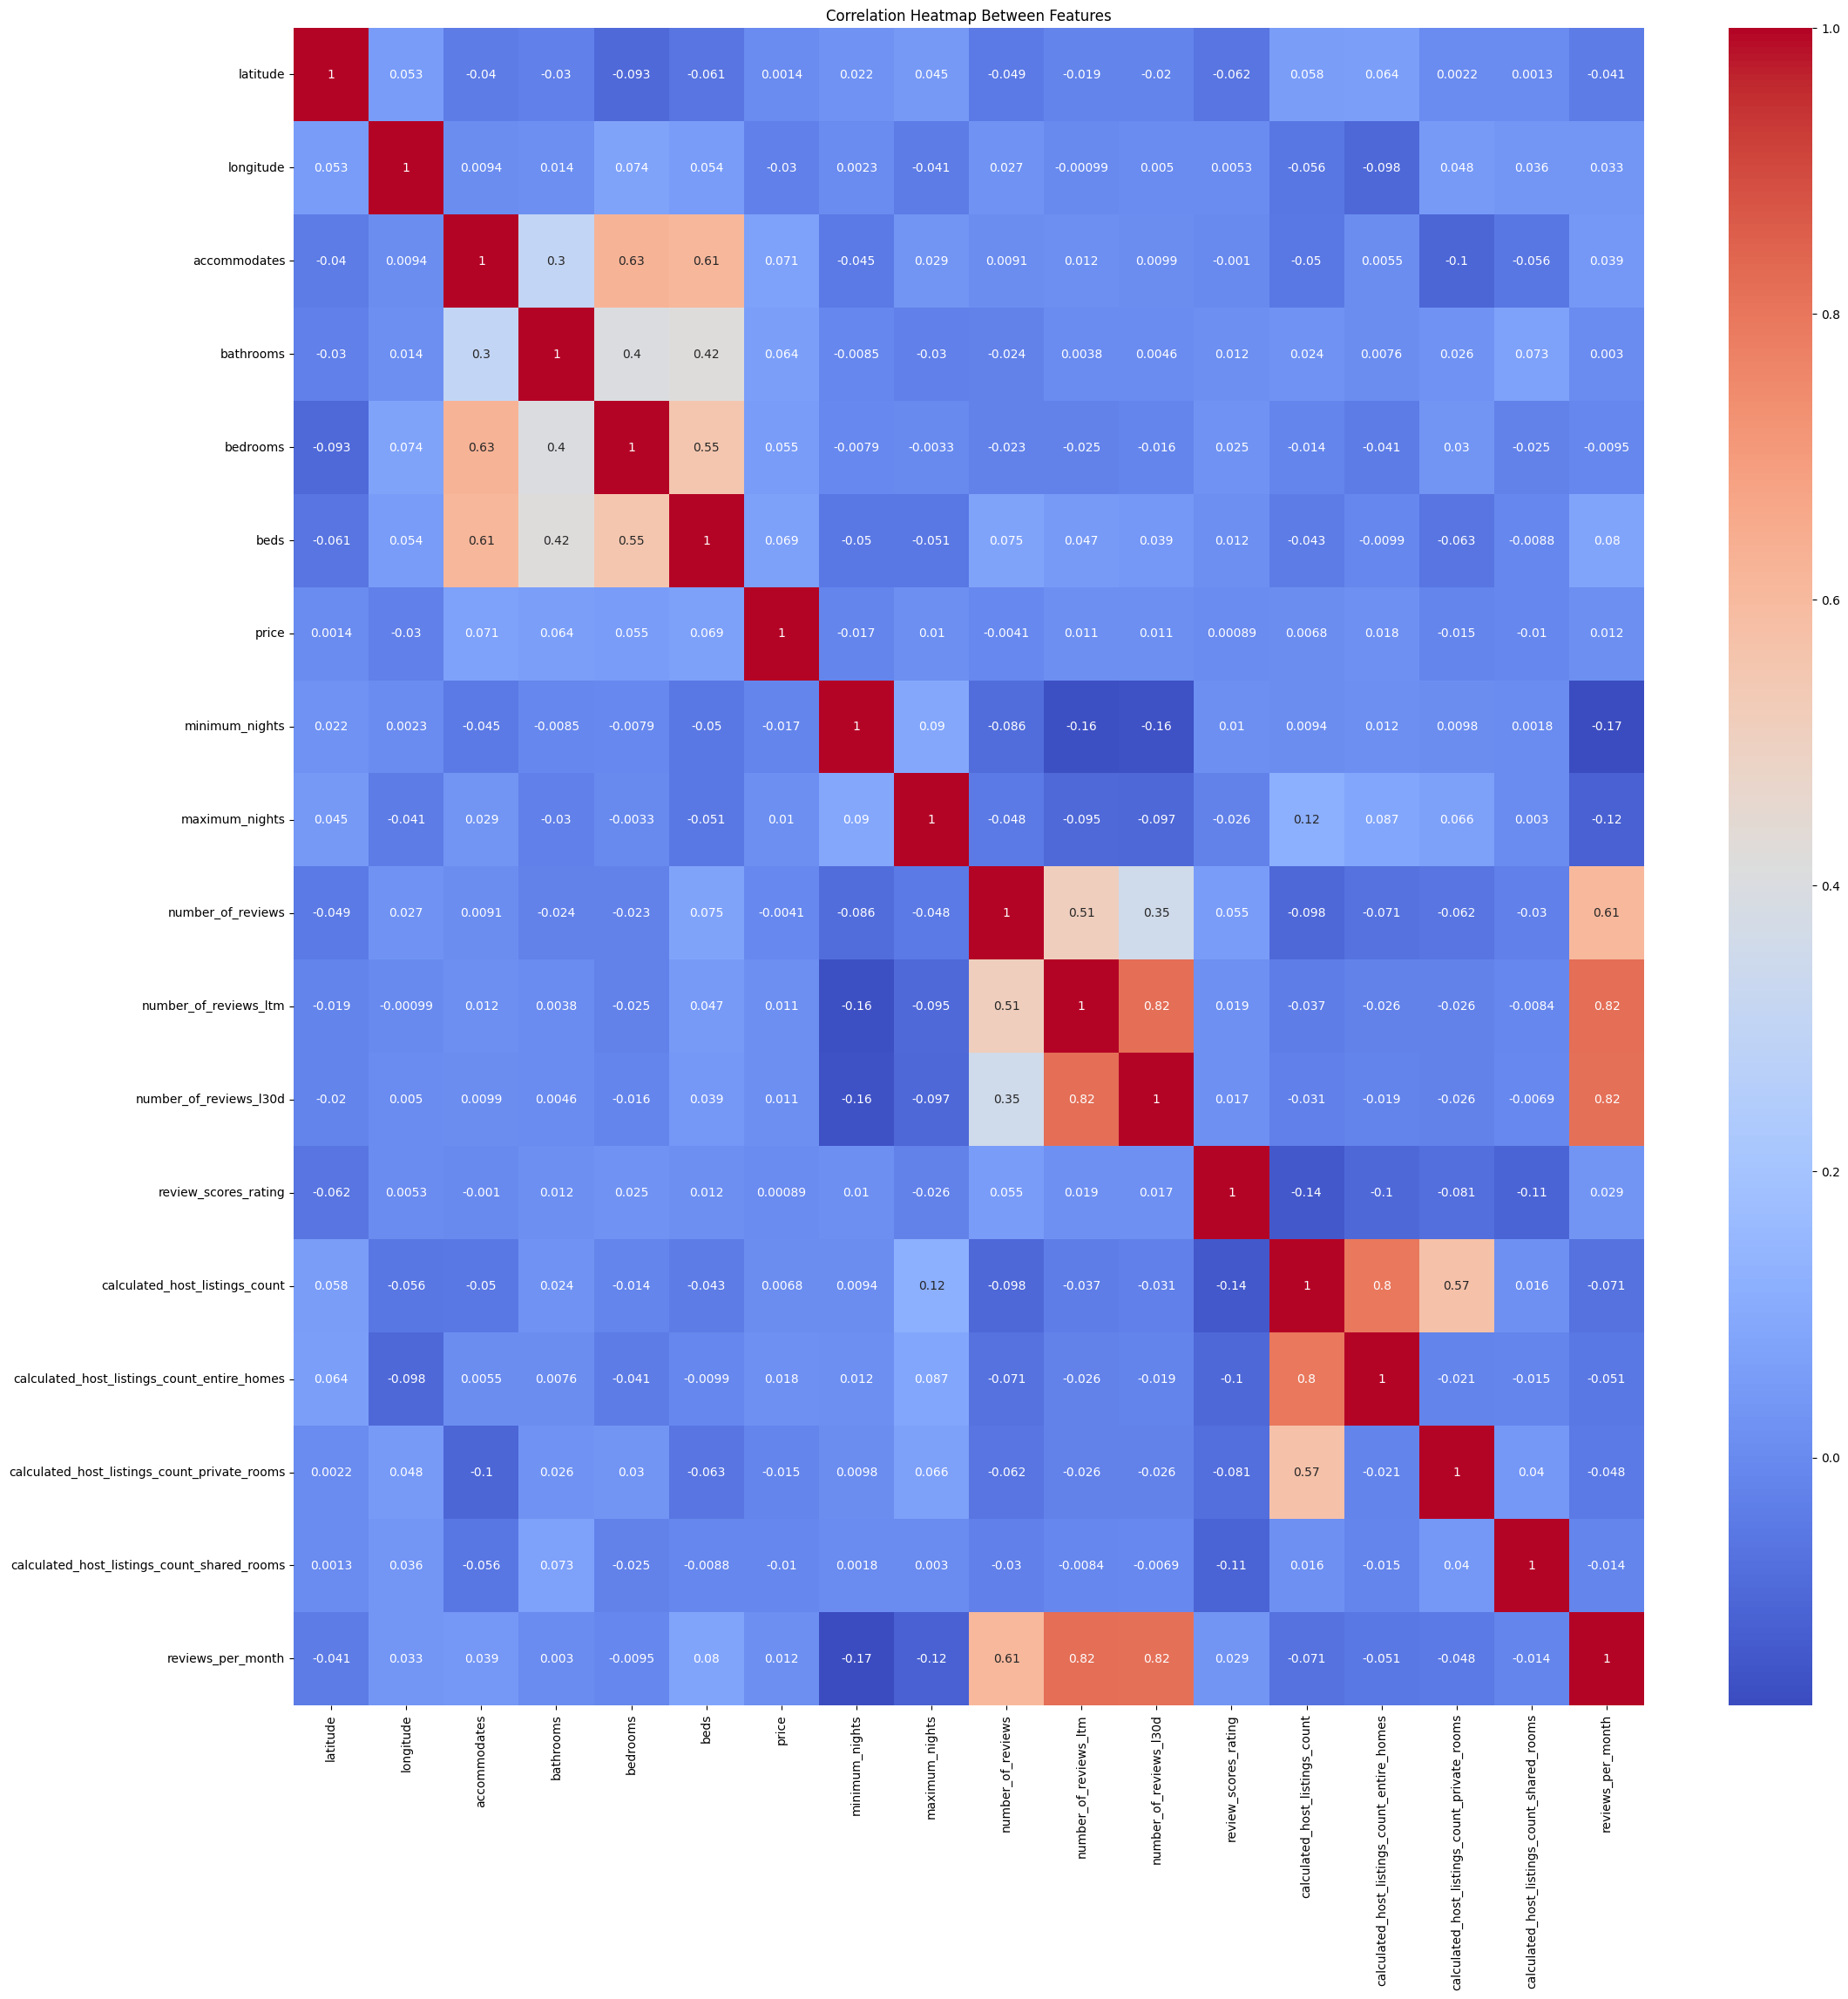

In [42]:
numeric_data = listings_csv_data.select_dtypes(include=['number', 'float', 'int'])
corr = numeric_data.corr()

fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)
ax.set_title("Correlation Heatmap Between Features")
plt.show()